In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
games_df = pd.read_csv('data/game/bbref_game_with_game_type.csv')
regular_season_df = games_df[games_df['GAME_TYPE'] == 'regular_season']

In [ ]:
team_files = [f for f in os.listdir('data/team/box_raw_with_game_type')]

In [5]:
# Get list of team files


# Process each team file
for team_file in team_files:
    team = team_file.replace('.csv', '')
    
    # Read team data
    team_df = pd.read_csv(f'data/team/box_raw_with_game_type/{team}.csv')
    
    # Convert dates to datetime for matching
    team_df['DATE'] = pd.to_datetime(team_df['DATE'])
    games_df['DATE'] = pd.to_datetime(games_df['DATE'])
    
    # Initialize REST column
    team_df['REST'] = None
    
    # Process each game
    for idx, row in team_df.iterrows():
        # Find matching game in games_df
        game = games_df[games_df['DATE'] == row['DATE']]
        
        # Get rest value based on home/away
        if team == game['HOME_TEAM'].iloc[0]:
            team_df.at[idx, 'REST'] = game['HOME_REST'].iloc[0]
        else:
            team_df.at[idx, 'REST'] = game['AWAY_REST'].iloc[0]
            
    # Save updated data back to file
    team_df.to_csv(f'data/team/box_raw_with_game_type/{team}.csv', index=False)


In [27]:
# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(rest_analysis)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

     REST_DAYS     AVG_PTS   SEASON  TYPE
165       2in2   91.017857  2000-01  AWAY
166       2in3   93.979798  2000-01  AWAY
167       2in4   93.856209  2000-01  AWAY
168      2in5+   93.608108  2000-01  AWAY
169  3in4_1in2   93.088235  2000-01  AWAY
170  3in4_2in2   93.986175  2000-01  AWAY
171       4in5   90.731343  2000-01  AWAY
0         2in2   96.918919  2000-01  HOME
1         2in3   96.254403  2000-01  HOME
2         2in4   96.283019  2000-01  HOME
3        2in5+   95.904348  2000-01  HOME
4    3in4_1in2   96.454023  2000-01  HOME
5    3in4_2in2   95.695652  2000-01  HOME
6         4in5   96.411765  2000-01  HOME
172       2in2   92.007692  2001-02  AWAY
173       2in3   94.887052  2001-02  AWAY
174       2in4   93.150289  2001-02  AWAY
175      2in5+   94.585714  2001-02  AWAY
176  3in4_1in2   93.916168  2001-02  AWAY
177  3in4_2in2   93.928230  2001-02  AWAY
178       4in5   91.493506  2001-02  AWAY
7         2in2   97.042254  2001-02  HOME
8         2in3   96.985859  2001-0

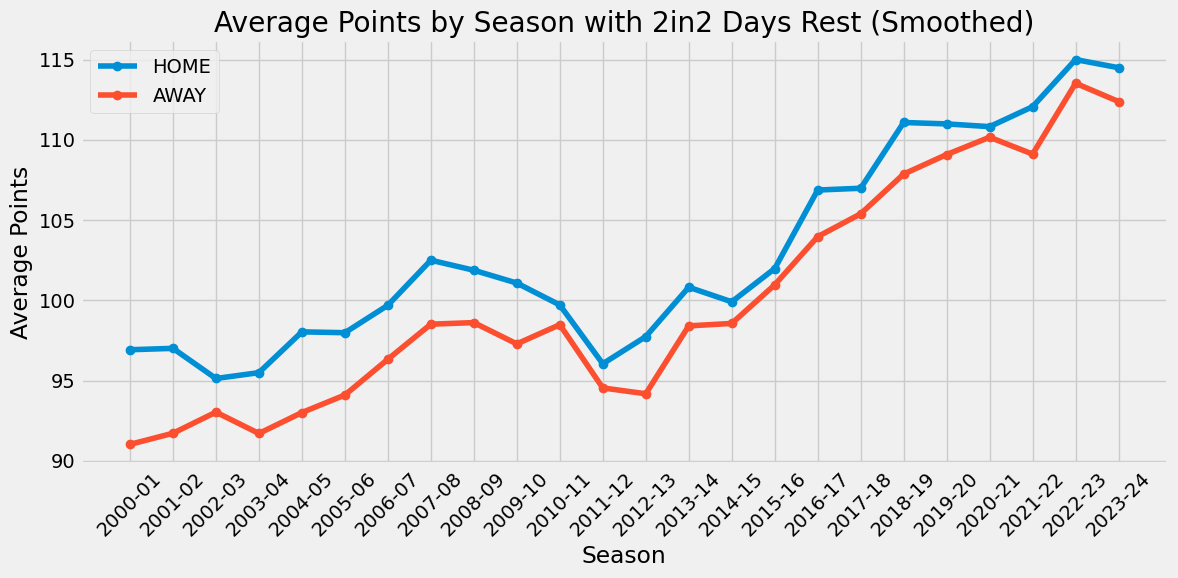

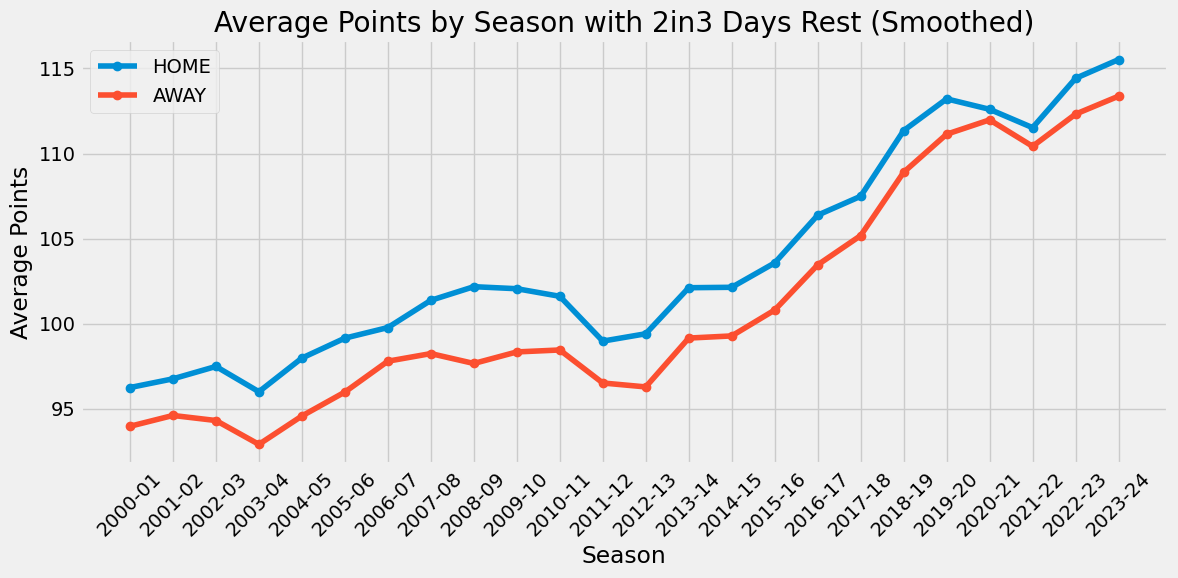

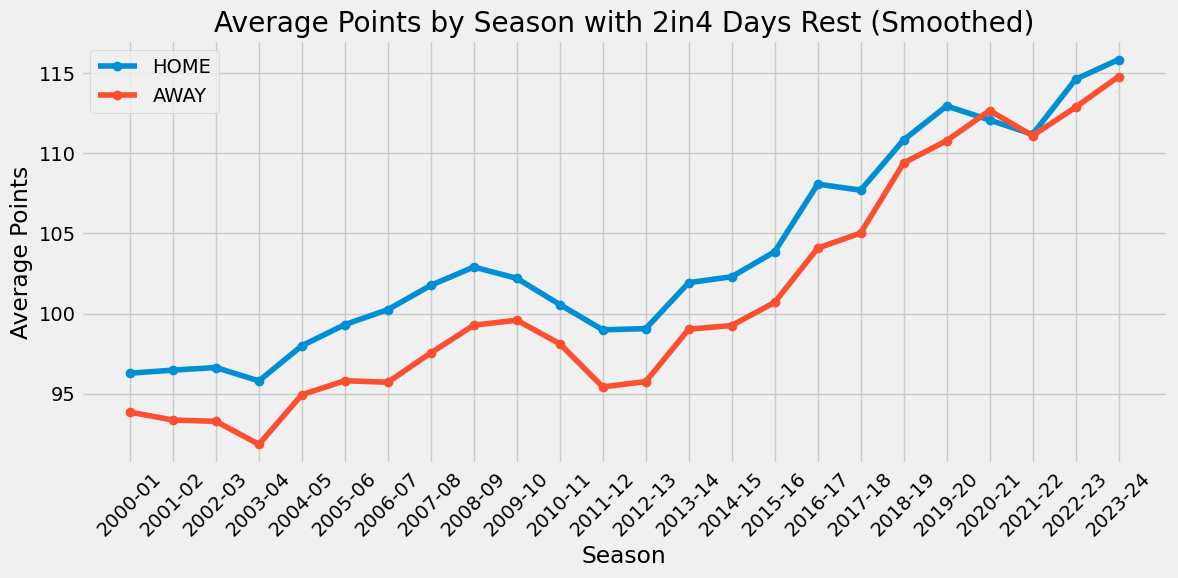

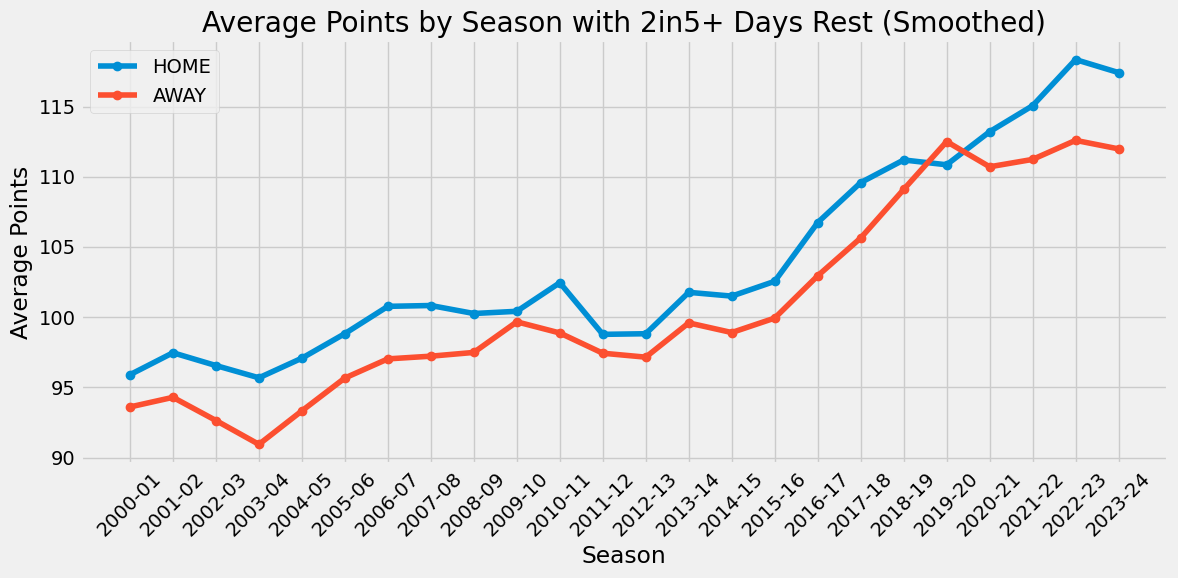

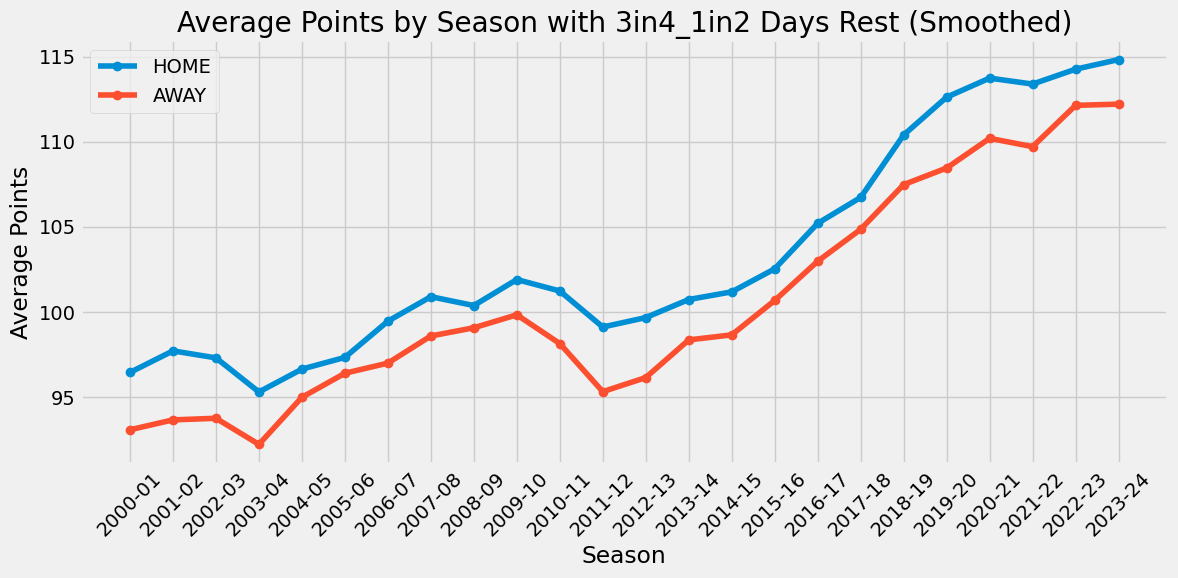

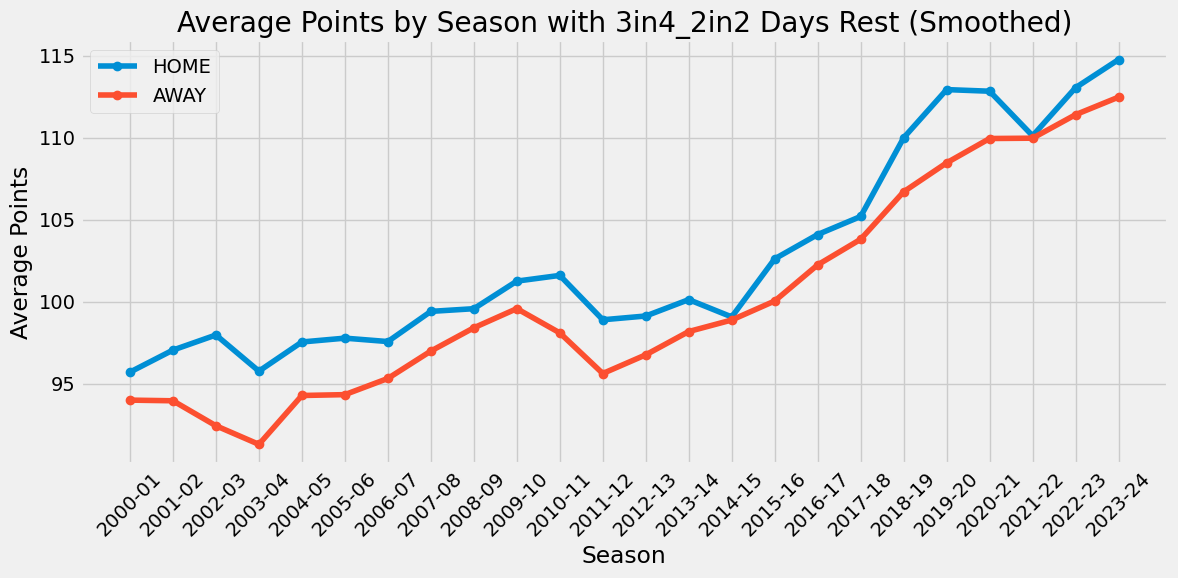

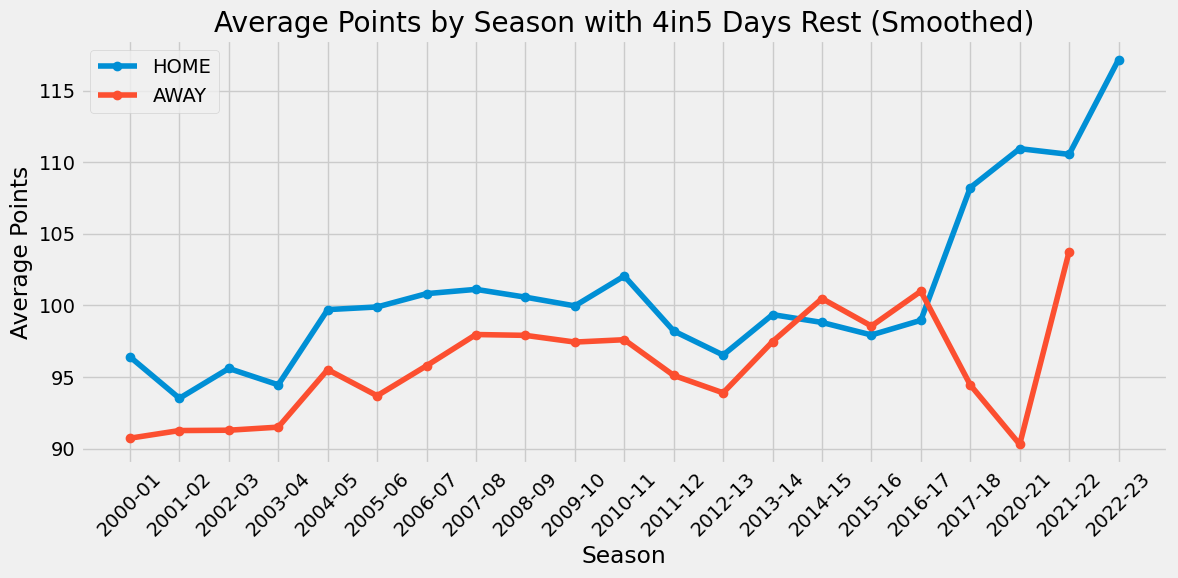

In [28]:
# Create a figure for each unique rest day value
for rest_days in rest_analysis['REST_DAYS'].unique():
    # Filter data for this rest day value
    rest_day_data = rest_analysis[rest_analysis['REST_DAYS'] == rest_days]
    
    # Create figure and axis
    plt.figure(figsize=(12, 6))
    
    # Plot home and away lines
    for location in ['HOME', 'AWAY']:
        location_data = rest_day_data[rest_day_data['TYPE'] == location]
        
        # Calculate weighted moving average (0.7 current + 0.3 previous)
        smoothed_pts = []
        seasons = location_data['SEASON'].tolist()
        pts = location_data['AVG_PTS'].tolist()
        
        for i in range(len(pts)):
            if i == 0:  # First season has no previous data
                smoothed_pts.append(pts[i])
            else:
                smoothed_val = 0.7 * pts[i] + 0.3 * pts[i-1]
                smoothed_pts.append(smoothed_val)
        
        plt.plot(seasons, smoothed_pts, marker='o', label=f'{location}')
    
    # Customize the plot
    plt.title(f'Average Points by Season with {rest_days} Days Rest (Smoothed)')
    plt.xlabel('Season')
    plt.ylabel('Average Points')
    plt.legend()
    plt.grid(True)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    plt.show()

In [34]:
q = games_df[(games_df['SEASON'] == '2019-20') & (games_df['AWAY_REST'] == '4in5')]

In [35]:
print(f"Number of games with 4 games in 5 days in 2020-21 season: {len(q)}")

Number of games with 4 games in 5 days in 2020-21 season: 0
